<a href="https://colab.research.google.com/github/salahchahin/Data-Structure/blob/main/Chahin_Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://drive.google.com/uc?export=view&id=12B8SAPMBgZIcRKLsuR2CayCLxwa6XbK2' width="70">

# Setup

Mount Google Drive file system so that later you can read/write data from/to it.  E.g., below programs will save images on the file system.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "/content/drive/MyDrive/Colab Notebooks"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Load Fashion MNIST Dataset

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [4]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

print(type(X_train_full))
print(X_train_full[0])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
<class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88

Each pixel intensity is represented as a byte (0 to 255):

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255
X_test[0,7]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01176471,
       0.00392157, 0.        , 0.        , 0.02745098, 0.        ,
       0.14509804, 0.        , 0.        ])

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

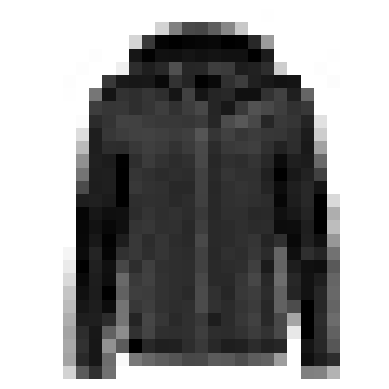

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [7]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [9]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [10]:
X_valid.shape

(5000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

Saving figure fashion_mnist_plot


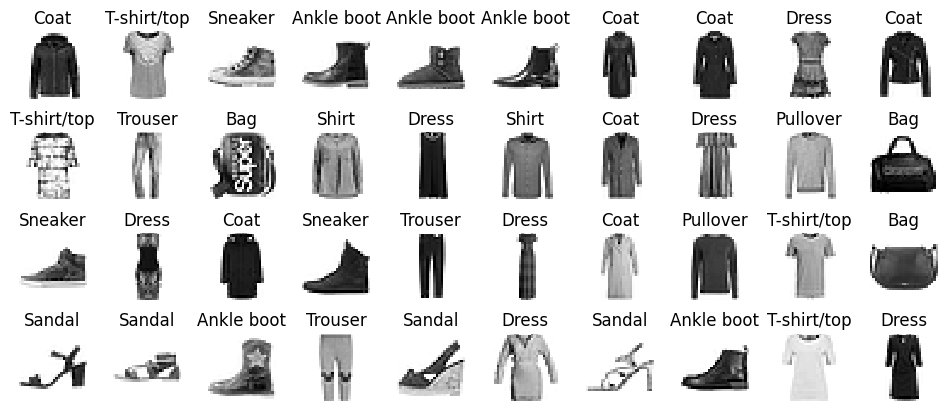

In [12]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

# Build and Train a Neural Network

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28, 1]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
model.layers

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


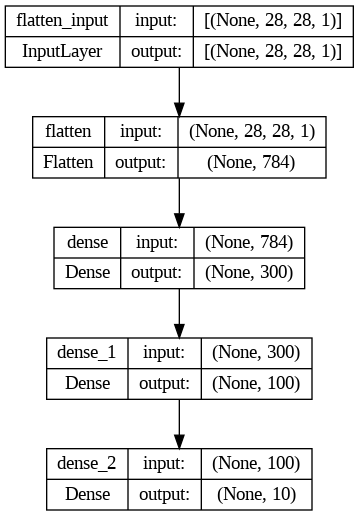

In [17]:
keras.utils.plot_model(model, IMAGES_PATH+"/my_fashion_mnist_model.png", show_shapes=True)

In [18]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [19]:
model.get_layer(hidden1.name) is hidden1

True

In [20]:
weights, biases = hidden1.get_weights()

In [21]:
weights

array([[-0.04475787,  0.07339045, -0.03247808, ..., -0.03207293,
         0.06073354, -0.05097563],
       [-0.02202552,  0.02253788,  0.02763439, ..., -0.05293412,
        -0.02601235,  0.0001371 ],
       [ 0.00311186,  0.02727845, -0.03493405, ..., -0.05173529,
         0.07025576,  0.03423022],
       ...,
       [ 0.04933548, -0.03169034, -0.05836126, ..., -0.04297256,
         0.00954006,  0.04721909],
       [-0.07210328,  0.06145836, -0.02625722, ..., -0.0333201 ,
         0.06018297, -0.03265337],
       [-0.03994955,  0.0124405 ,  0.04451398, ..., -0.06646156,
         0.02549754,  0.00781966]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [26]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))
# below you see, for each epoch, a progress bar for 1719 batches, each batch
# is of size 32.  Batch size is 32 by default.  If you want a different
# batch size, say, 60, set batch_size=60 inside fit call.

Epoch 1/10
1719/1719 [==============================] - 11s 3ms/step - loss: 0.7230 - accuracy: 0.7601 - val_loss: 0.5229 - val_accuracy: 0.8192
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4886 - accuracy: 0.8285 - val_loss: 0.4394 - val_accuracy: 0.8472
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4420 - accuracy: 0.8449 - val_loss: 0.5195 - val_accuracy: 0.8064
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4158 - accuracy: 0.8553 - val_loss: 0.3970 - val_accuracy: 0.8670
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3975 - accuracy: 0.8609 - val_loss: 0.3820 - val_accuracy: 0.8658
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3787 - accuracy: 0.8671 - val_loss: 0.3731 - val_accuracy: 0.8708
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3665 - accuracy: 0.8711 - val_loss: 0.3682 - val_accuracy

In [27]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [28]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


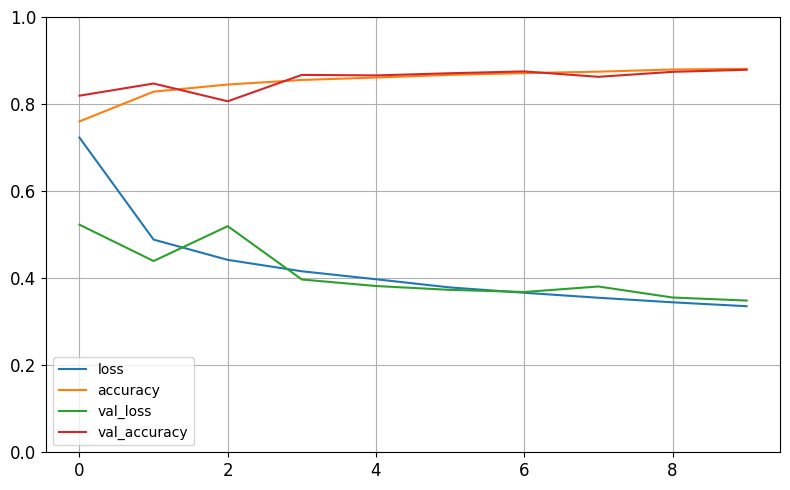

In [30]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

# Evaluate and Predict

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3871 - accuracy: 0.8616


[0.38709259033203125, 0.8615999817848206]

In [32]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 88ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.07, 0.  , 0.87],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [33]:
#y_pred = model.predict_classes(X_new)  # Function predict_classes was removed 
                                        # in TensorFlow version 2.6
y_pred = (model.predict(X_new) > 0.5).astype("int32")

y_pred

1/1 [==============================] - 0s 19ms/step


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [34]:
np.array(class_names)[y_pred]

array([['T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'Trouser'],
       ['T-shirt/top', 'T-shirt/top', 'Trouser', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top'],
       ['T-shirt/top', 'Trouser', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top']], dtype='<U11')

In [35]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


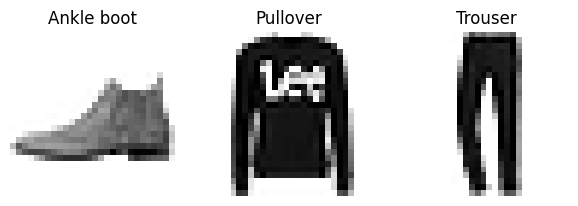

In [36]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Homework3 Starts Here:

# Build the step1_model with the same architecture as model
step1_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Compile the model with optimizer 'adam' instead of 'sgd'
step1_model.compile(loss="sparse_categorical_crossentropy",
                    optimizer="adam",
                    metrics=["accuracy"])

# Train the model on the training set
step1_history = step1_model.fit(X_train, y_train, epochs=10,
                                 validation_data=(X_valid, y_valid))

# Evaluate the model on the test set
step1_test_loss, step1_test_accuracy = step1_model.evaluate(X_test, y_test)

# Print the results of the evaluate method call
print(f"Test loss: {step1_test_loss:.4f}, Test accuracy: {step1_test_accuracy:.4f}")

# Unmount Google Drive
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')


# Build the step2_model with the same architecture as step1_model but with an extra hidden layer
step2_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Compile the model with optimizer 'adam'
step2_model.compile(loss="sparse_categorical_crossentropy",
                    optimizer="adam",
                    metrics=["accuracy"])

# Train the model on the training set
step2_history = step2_model.fit(X_train, y_train, epochs=10,
                                 validation_data=(X_valid, y_valid))

# Evaluate the model on the test set
step2_test_loss, step2_test_accuracy = step2_model.evaluate(X_test, y_test)

# Print the results of the evaluate method call
print(f"Test loss: {step2_test_loss:.4f}, Test accuracy: {step2_test_accuracy:.4f}")


# Reshape the input data
X_train_reshaped = X_train.reshape(-1, 28, 28, 1)
X_valid_reshaped = X_valid.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test.reshape(-1, 28, 28, 1)

# Build the step3_model with a Conv2D layer, a MaxPooling2D layer, a Flatten layer, a Dense layer with 100 neurons, and an output layer with 10 neurons
step3_model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Compile the model with optimizer 'adam'
step3_model.compile(loss="sparse_categorical_crossentropy",
                    optimizer="adam",
                    metrics=["accuracy"])

# Train the model on the training set
step3_history = step3_model.fit(X_train_reshaped, y_train, epochs=10,
                                 validation_data=(X_valid_reshaped, y_valid))

# Evaluate the model on the test set
step3_test_loss, step3_test_accuracy = step3_model.evaluate(X_test_reshaped, y_test)

# Print the results of the evaluate method call
print(f"Test loss: {step3_test_loss:.4f}, Test accuracy: {step3_test_accuracy:.4f}")


In [37]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.
